In [1]:
library(dplyr)
library(tidyr)

library(ggplot2)
library(ggtree)
library(castor)
library(treeio)

library(gridExtra)
library(cowplot)
library(egg)
library(grid)






 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


ggtree v3.6.2 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu. Using ggtree to visualize data on tree-like structures.
Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96

G Yu. Data Integration, Manipulation and Visualization of Phylogenetic
Trees (1st ed.). Chapman and Hall/CRC. 2022. ISBN: 9781032233574 


 次のパッケージを付け加えます: ‘ggtree’ 


 以下のオブジェクトは ‘package:tidyr’ からマスクされています:

    expand


 要求されたパッケージ Rcpp をロード中です

In [2]:
tree_f = "../01_codeml/Model_M02_branch/HRR25_codemloutput_M2_dNtree.txt"

In [3]:
tree = read.newick(tree_f)
tree


Phylogenetic tree with 89 tips and 87 internal nodes.

Tip labels:
  HRR25_29.1, HRR25_27.1, HRR25_28.1, HRR25_30.1, HRR25_14.2, HRR25_14.1, ...

Rooted; includes branch lengths.

In [4]:
annot_df = read.csv("./tree_annotation.csv")
annot_df$label = paste(annot_df$Species,annot_df$GeneID,sep="_") 


In [5]:
tr2 = rename_taxa(tree, annot_df, ID_codeml, label)
write.tree(tr2,f= "./Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed.txt")


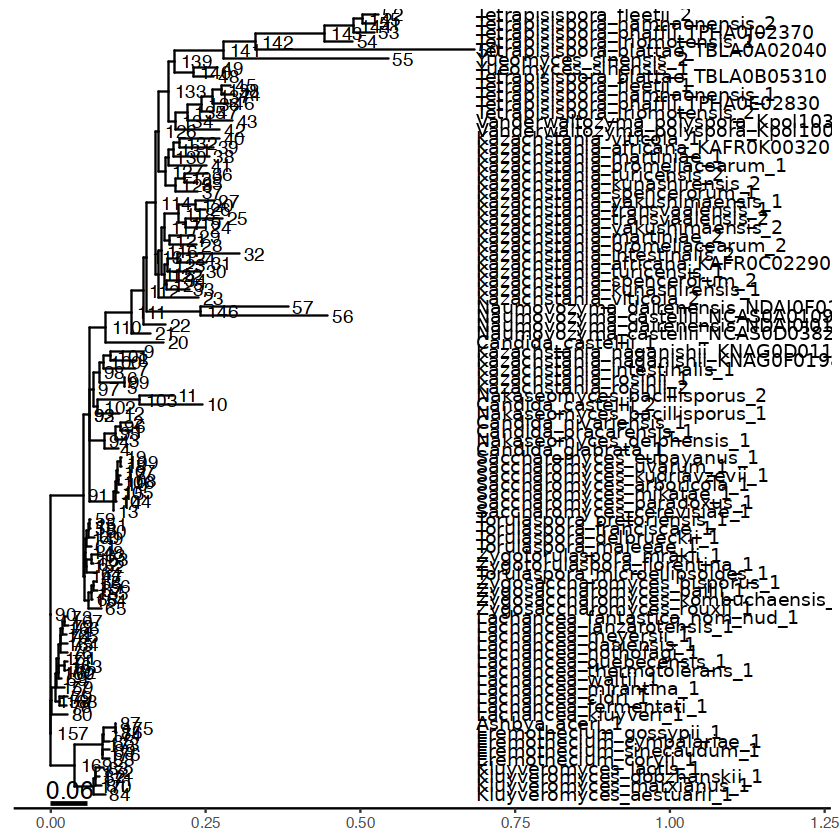

In [6]:
tree_p=ggtree(tr2) + theme_tree2(legend.position=c(.1,.9))+ geom_text(aes(label=node), hjust=-.2)+
geom_treescale(x=0, linesize = 1,fontsize = 5,family = "Helvetica",color="#000000")+
geom_tiplab(align = TRUE,linesize=0)+ggplot2::xlim(0,1.2)+
theme(legend.position="left",legend.title=element_text(color="#000000"))
tree_p
p <-set_panel_size(tree_p,width  = unit(50, "cm"),height = unit(12, "cm")) 
ggsave(plot=p,"../01_codeml/Model_M02_branch/HRR25_codemloutput_M2_dNtree.pdf",limitsize = FALSE ,width=unit(20,"cm"),height=unit(10,"cm"))



In [7]:
# node 92 is post-WGD point
# node 91 is the last common for post-WGD and non-WGD

In [8]:
dist_mat = get_all_pairwise_distances( tr2,
                            only_clades     = NULL, 
                            as_edge_counts  = FALSE,
                            check_input     = TRUE)

In [9]:
tr2


Phylogenetic tree with 89 tips and 87 internal nodes.

Tip labels:
  Candida_bracarensis_1, Candida_nivariensis_1, Nakaseomyces_delphensis_1, Candida_glabrata_1, Kazachstania_rosinii_2, Kazachstania_rosinii_1, ...

Rooted; includes branch lengths.

In [10]:
#tree$tip.label
dist_tips = as.data.frame(dist_mat)[c(seq(1,89)),c(seq(1,92))]

In [11]:
names(dist_tips) = c(tr2$tip.label,"Outgroup","PreWGD","PostWGD")
row.names(dist_tips) = c(tr2$tip.label)


In [12]:
dist_tips$ID = row.names(dist_tips)
dist_tips$ScreeningID = c(tree$tip.label)


In [13]:
data = dist_tips  %>%  relocate(ID) %>% separate(ID, c("Genus", "Species","Copy")) 

Warning message:
“Expected 3 pieces. Additional pieces discarded in 1 rows [73].”


In [14]:
write.csv(data,"./Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed_distances.csv")
# I added WGD status for each gene
data = read.csv("./Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed_distances_WGDstatusadded.csv")

In [15]:
data = data
head(data)

,ID,Genus,Species,Copy,Status,Candida_bracarensis_1,Candida_nivariensis_1,Nakaseomyces_delphensis_1,Candida_glabrata_1,Kazachstania_rosinii_2,⋯,Kluyveromyces_lactis_1,Kluyveromyces_aestuarii_1,Eremothecium_cymbalariae_1,Eremothecium_gossypii_1,Ashbya_aceri_1,Eremothecium_coryli_1,Eremothecium_sinecaudum_1,Outgroup,PreWGD,PostWGD
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ashbya_aceri_1,Ashbya,aceri,1,Outgroup,0.233953,0.234236,0.226853,0.213190,0.223636,⋯,0.114145,0.116947,0.027750,0.003252,0.000000,0.033049,0.034441,0.104442,0.156710,0.167131
2,Candida_bracarensis_1,Candida,bracarensis,1,PostWGD_l,0.000000,0.035285,0.043760,0.065633,0.123327,⋯,0.214418,0.217220,0.223469,0.235963,0.233953,0.223628,0.225020,0.129511,0.077243,0.066822
3,Candida_castellii_1,Candida,castellii,1,PostWGD_m,0.185635,0.185918,0.178535,0.164872,0.175318,⋯,0.266409,0.269211,0.275460,0.287954,0.285944,0.275619,0.277011,0.181502,0.129234,0.118813
4,Candida_castellii_2,Candida,castellii,2,PostWGD_m,0.248919,0.249202,0.241819,0.228156,0.224704,⋯,0.329693,0.332495,0.338744,0.351238,0.349228,0.338903,0.340295,0.244786,0.192518,0.182097
5,Candida_glabrata_1,Candida,glabrata,1,PostWGD_l,0.065633,0.065916,0.058533,0.000000,0.102564,⋯,0.193655,0.196457,0.202706,0.215200,0.213190,0.202865,0.204257,0.108748,0.056480,0.046059
6,Candida_nivariensis_1,Candida,nivariensis,1,PostWGD_l,0.035285,0.000000,0.044043,0.065916,0.123610,⋯,0.214701,0.217503,0.223752,0.236246,0.234236,0.223911,0.225303,0.129794,0.077526,0.067105


In [16]:
data$Genus_species = paste(data$Genus,data$Species,sep="_")
data$State = factor(data$Status,levels=c("Outgroup","NonWGD","PostWGD_l","PostWGD_m"))

In [17]:
#dist_data$group = interaction(dist_data$State, dist_data$Locus, sep="_")
#levels(dist_data$group) 

data$group= factor(data$State,levels=c("Outgroup","NonWGD","PostWGD_l","PostWGD_m"))

In [18]:
theme =  theme_bw()  +  
        theme( panel.spacing = unit(2, "lines"), 
       legend.title.align = 0.5,
        legend.key = element_blank(),
        strip.background = element_rect(
        color="#FFFFFF",fill="#FFFFFF"),
        panel.border = element_rect(linewidth=1.0),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        axis.ticks = element_line(color = "#000000", linewidth = 0.5),
        axis.text.x = element_text(color="#000000",size=9.5),
        axis.text.y = element_text(color="#000000",size=9.5),
        strip.text.y = element_text(size = 9.5, color = "#000000"), 
        strip.text.x = element_text(size = 9.5, color = "#000000"),
        axis.title=element_text(size=9.5, color = "#000000")
)


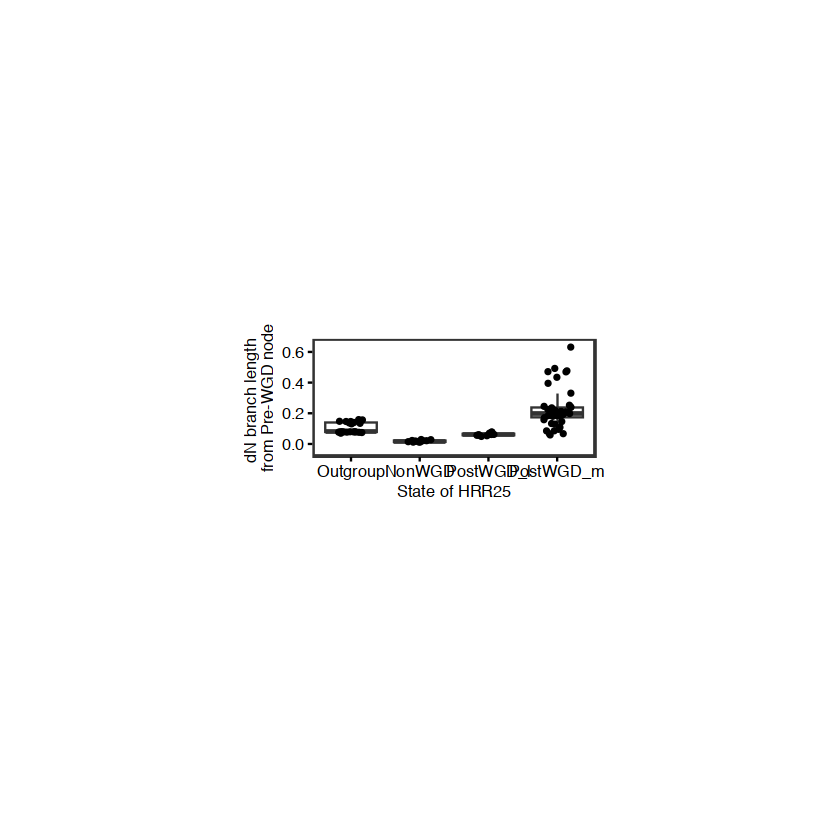

In [19]:
#head(dist_data)

b <- runif(nrow(data), -0.2, 0.2)

p_violin <- ggplot(data) +
            #geom_violin(aes(x = as.numeric(group), y =Zygosaccharomyces_rouxii_ZYRO0G08866g,fill=Locus ,group=group))+
            geom_boxplot(aes(x = as.numeric(group), y =PreWGD ,group=group),outlier.shape = NA)+ # The points are shown, so I exclude redundunt points
            #geom_line(aes(x  = as.numeric(group) + b, y = PreWGD, group = Genus_species),color="#ababab",linetype="dashed") +
            geom_point(aes(x = as.numeric(group) + b, y = PreWGD),size=1) +  
            scale_x_continuous(breaks = c(1,2,3,4), labels = levels(data$group) )+
            xlab("State of HRR25")+
            ylab("dN branch length \nfrom Pre-WGD node")+
            #scale_fill_manual(values=colors)+
            scale_y_continuous(limits=c(-0.05,.65))

P = p_violin+theme+theme(aspect.ratio=0.5)

p <-set_panel_size(P,width  = unit(6, "cm"),height = unit(2.5, "cm")) 
　　#このサイズと最後に保存する際のサイズは違うので注意。
grid.newpage()
grid.draw(p)

#ファイルに保存するサイズの指定
ggsave(plot=p,"./Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed_distances_WGDstatusadded.pdf" ,width=unit(5,"cm"),height=unit(3,"cm"))
　　#この保存サイズは大まかに　1ページ幅=14cm, 半ページ幅=7cm くらいです。




In [20]:
# Check for significance
library(tidyverse)
library(rstatix)
library(ggpubr)

data %>%
  group_by(State) %>%
  get_summary_stats(PreWGD, type = "mean_sd")

pairwise_wilcox_test(
  data,
  PreWGD~State,
  comparisons = NULL,
  ref.group = NULL,
  p.adjust.method = "holm",
  detailed = FALSE,
)

# Some significance of mean distance observed

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
✔ purrr     1.0.1     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ ggtree::expand()     masks tidyr::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
✖ lubridate::stamp()   masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

 次のパッケージを付け加えます: ‘rstatix’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter



 次のパッケージを付け加えます: ‘ggpubr’ 


 以下のオブジェクトは ‘package:egg’ から

State,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Outgroup,PreWGD,21,0.106,0.035
NonWGD,PreWGD,11,0.019,0.006
PostWGD_l,PreWGD,11,0.062,0.009
PostWGD_m,PreWGD,46,0.227,0.125


,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,PreWGD,Outgroup,NonWGD,21,11,231,1.55e-08,6.20e-08,****
2,PreWGD,Outgroup,PostWGD_l,21,11,220,3.02e-06,5.68e-06,****
3,PreWGD,Outgroup,PostWGD_m,21,46,122,1.51e-07,4.53e-07,****
4,PreWGD,NonWGD,PostWGD_l,11,11,0,2.84e-06,5.68e-06,****
5,PreWGD,NonWGD,PostWGD_m,11,46,0,1.08e-11,6.48e-11,****
6,PreWGD,PostWGD_l,PostWGD_m,11,46,13,4.01e-09,2.00e-08,****


In [21]:
head(data)

,ID,Genus,Species,Copy,Status,Candida_bracarensis_1,Candida_nivariensis_1,Nakaseomyces_delphensis_1,Candida_glabrata_1,Kazachstania_rosinii_2,⋯,Eremothecium_gossypii_1,Ashbya_aceri_1,Eremothecium_coryli_1,Eremothecium_sinecaudum_1,Outgroup,PreWGD,PostWGD,Genus_species,State,group
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
1,Ashbya_aceri_1,Ashbya,aceri,1,Outgroup,0.233953,0.234236,0.226853,0.213190,0.223636,⋯,0.003252,0.000000,0.033049,0.034441,0.104442,0.156710,0.167131,Ashbya_aceri,Outgroup,Outgroup
2,Candida_bracarensis_1,Candida,bracarensis,1,PostWGD_l,0.000000,0.035285,0.043760,0.065633,0.123327,⋯,0.235963,0.233953,0.223628,0.225020,0.129511,0.077243,0.066822,Candida_bracarensis,PostWGD_l,PostWGD_l
3,Candida_castellii_1,Candida,castellii,1,PostWGD_m,0.185635,0.185918,0.178535,0.164872,0.175318,⋯,0.287954,0.285944,0.275619,0.277011,0.181502,0.129234,0.118813,Candida_castellii,PostWGD_m,PostWGD_m
4,Candida_castellii_2,Candida,castellii,2,PostWGD_m,0.248919,0.249202,0.241819,0.228156,0.224704,⋯,0.351238,0.349228,0.338903,0.340295,0.244786,0.192518,0.182097,Candida_castellii,PostWGD_m,PostWGD_m
5,Candida_glabrata_1,Candida,glabrata,1,PostWGD_l,0.065633,0.065916,0.058533,0.000000,0.102564,⋯,0.215200,0.213190,0.202865,0.204257,0.108748,0.056480,0.046059,Candida_glabrata,PostWGD_l,PostWGD_l
6,Candida_nivariensis_1,Candida,nivariensis,1,PostWGD_l,0.035285,0.000000,0.044043,0.065916,0.123610,⋯,0.236246,0.234236,0.223911,0.225303,0.129794,0.077526,0.067105,Candida_nivariensis,PostWGD_l,PostWGD_l


In [22]:
# Plot the R' of assymetry 

# Extract species with status of "Post-WGD maintained"
duplicated_maintained_data = data %>% filter(State == "PostWGD_m") %>% select(Genus_species,PreWGD,Copy)
duplicated_maintained_data_w = reshape(duplicated_maintained_data, idvar = "Genus_species", timevar = "Copy", direction = "wide")
names(duplicated_maintained_data_w) = c("Species","DupA","DupB")
head(duplicated_maintained_data_w)

,Species,DupA,DupB
,<chr>,<dbl>,<dbl>
1,Candida_castellii,0.129234,0.192518
3,Kazachstania_africana,0.198928,0.210038
5,Kazachstania_bromeliacearum,0.198734,0.183581
7,Kazachstania_intestinalis,0.085103,0.252508
9,Kazachstania_kunashirensis,0.171202,0.184846
11,Kazachstania_martiniae,0.203372,0.180317


In [23]:
# Organize data so that we can compute R'

data_w = duplicated_maintained_data_w %>% rowwise() %>% mutate(min =min(c(DupA,DupB)),max=max(c(DupA,DupB)) ,R = max(c(DupA,DupB))/min(c(DupA,DupB)))
head(data_w)

Species,DupA,DupB,min,max,R
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Candida_castellii,0.129234,0.192518,0.129234,0.192518,1.489685
Kazachstania_africana,0.198928,0.210038,0.198928,0.210038,1.055849
Kazachstania_bromeliacearum,0.198734,0.183581,0.183581,0.198734,1.082541
Kazachstania_intestinalis,0.085103,0.252508,0.085103,0.252508,2.967087
Kazachstania_kunashirensis,0.171202,0.184846,0.171202,0.184846,1.079695
Kazachstania_martiniae,0.203372,0.180317,0.180317,0.203372,1.127858


In [24]:
# Sort data based on value of R'
data_w <- data_w[order(data_w$max,decreasing=TRUE),]
head(data_w)

Species,DupA,DupB,min,max,R
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tetrapisispora_blattae,0.631380,0.210882,0.210882,0.631380,2.993997
Yueomyces_sinensis,0.217293,0.492384,0.217293,0.492384,2.265991
Tetrapisispora_fleetii,0.238704,0.476498,0.238704,0.476498,1.996188
Tetrapisispora_namnaonensis,0.245192,0.471324,0.245192,0.471324,1.922265
Tetrapisispora_phaffii,0.235317,0.469980,0.235317,0.469980,1.997221
Tetrapisispora_iriomotensis,0.434661,0.209915,0.209915,0.434661,2.070652


In [25]:
# Sort data based on value of R'
data_w <- data_w[order(data_w$R,decreasing=TRUE),]
data_w$Rank = rank(-data_w$R)
data_w$Species= factor(data_w$Species,levels=data_w$Species)
head(data_w)

Species,DupA,DupB,min,max,R,Rank
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naumovozyma_castellii,0.395376,0.108270,0.108270,0.395376,3.651759,1
Tetrapisispora_blattae,0.631380,0.210882,0.210882,0.631380,2.993997,2
Kazachstania_intestinalis,0.085103,0.252508,0.085103,0.252508,2.967087,3
Nakaseomyces_bacillisporus,0.058716,0.146220,0.058716,0.146220,2.490292,4
Naumovozyma_dairenensis,0.331043,0.133123,0.133123,0.331043,2.486745,5
Yueomyces_sinensis,0.217293,0.492384,0.217293,0.492384,2.265991,6


In [26]:

data_w$Species

[1] Naumovozyma_castellii       Tetrapisispora_blattae     
 [3] Kazachstania_intestinalis   Nakaseomyces_bacillisporus 
 [5] Naumovozyma_dairenensis     Yueomyces_sinensis         
 [7] Tetrapisispora_iriomotensis Tetrapisispora_phaffii     
 [9] Tetrapisispora_fleetii      Tetrapisispora_namnaonensis
[11] Candida_castellii           Kazachstania_viticola      
[13] Kazachstania_spencerorum    Kazachstania_transvaalensis
[15] Kazachstania_martiniae      Kazachstania_naganishii    
[17] Vanderwaltozyma_polyspora   Kazachstania_bromeliacearum
[19] Kazachstania_kunashirensis  Kazachstania_yakushimaensis
[21] Kazachstania_africana       Kazachstania_turicensis    
[23] Kazachstania_rosinii       
23 Levels: Naumovozyma_castellii ... Kazachstania_rosinii

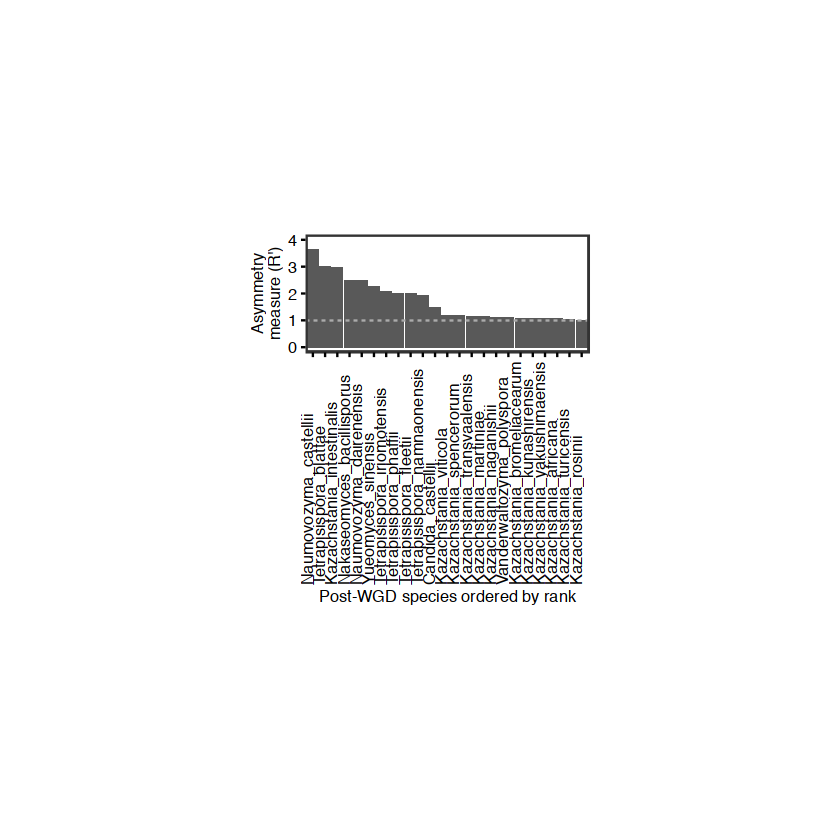

In [27]:
P= ggplot(data_w) +
  geom_col(aes(y = R,x=Species)) +
  theme+geom_hline(yintercept=1.0,color="#ababab",linetype="dashed")+
    theme(axis.text.x=element_text(color="#000000",angle=90,hjust=0,vjust=0))+

    xlab("Post-WGD species ordered by rank")+
    ylab("Asymmetry\nmeasure (R')")+
  scale_x_discrete()+
scale_y_continuous(limits=c(0,4))

p <-set_panel_size(P,width  = unit(6, "cm"),height = unit(2.5, "cm")) 
grid.newpage()
grid.draw(p)


ggsave(plot=p,"./Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed_distances_WGDstatusadded_dist_asymmetry_sp.pdf" ,width=unit(5,"cm"),height=unit(3,"cm"))




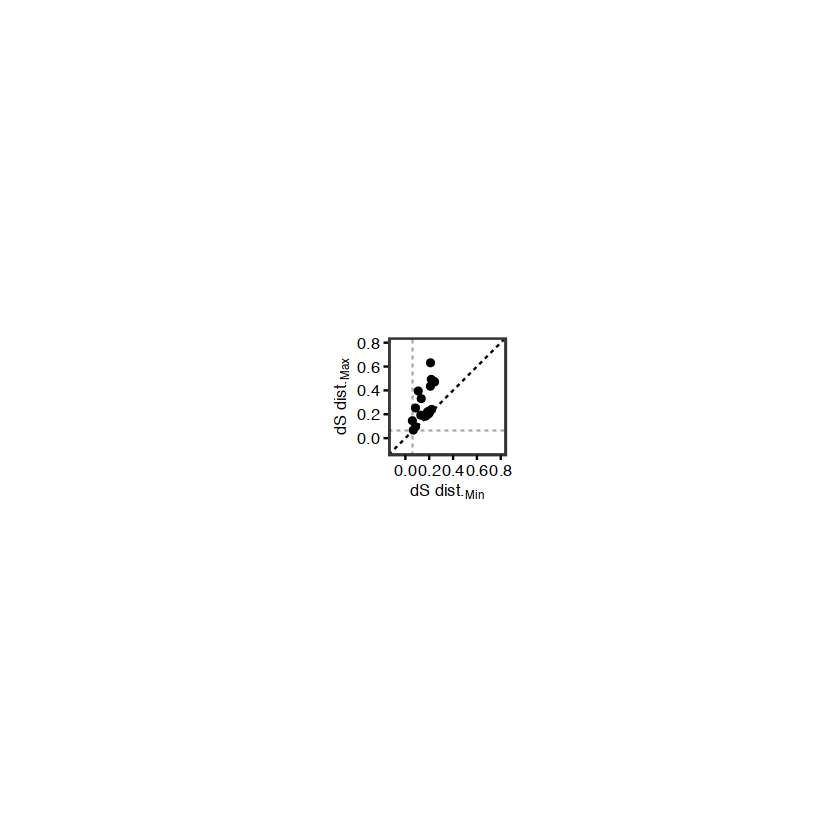

In [28]:
P= ggplot(data_w) +
  theme+
    geom_abline(slope=1.0,color="#000000",linetype="dashed")+
    geom_hline(yintercept=0.06,color="#ababab",linetype="dashed")+
     geom_vline(xintercept=0.06,color="#ababab",linetype="dashed")+
  geom_point(aes(x = min,y=max)) +
    xlab(bquote("dS dist."[Min]))+
    ylab(bquote("dS dist."[Max]))+
  scale_x_continuous(limits=c(-0.1,0.8))+
scale_y_continuous(limits=c(-0.1,0.8))

p <-set_panel_size(P,width  = unit(2.5, "cm"),height = unit(2.5, "cm")) 
grid.newpage()
grid.draw(p)


ggsave(plot=p,".Results/Model_M02_branch/HRR25_codemloutput_M2_dNtree_renamed_distances_WGDstatusadded_dist_scatter.pdf" ,width=unit(3,"cm"),height=unit(3,"cm"))




In [37]:

data_comp = read.csv("./HRR25_codemloutput_M2_dNtree_renamed_distances_WGD_statusadded_comp.csv")
data = data_comp%>% select(Genus,Species,Status,PreWGD,Gene_name,Screened,CompAUC)%>% filter(Screened =="Yes") %>% filter(Species != "cerevisiae")


head(data)
#na.omit(data)


,Genus,Species,Status,PreWGD,Gene_name,Screened,CompAUC
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Candida,glabrata,Post-WGD_lost,0.056480,CAGL0H03553g,Yes,0.8241210
2,Kazachstania,africana,Post-WGD_m,0.198928,KAFR0C02290,Yes,0.9115596
3,Kazachstania,africana,Post-WGD_m,0.210038,KAFR0K00320,Yes,0.8491312
4,Kazachstania,naganishii,Post-WGD_m,0.095357,KNAG0D01130,Yes,0.9084874
5,Kazachstania,naganishii,Post-WGD_m,0.085731,KNAG0F01980,Yes,0.9303078
6,Naumovozyma,castellii,Post-WGD_m,0.395376,NCAS0A01090,Yes,0.3524904


In [38]:
unique(data$Status)

[1] "Post-WGD_lost" "Post-WGD_m"    "Non-WGD"

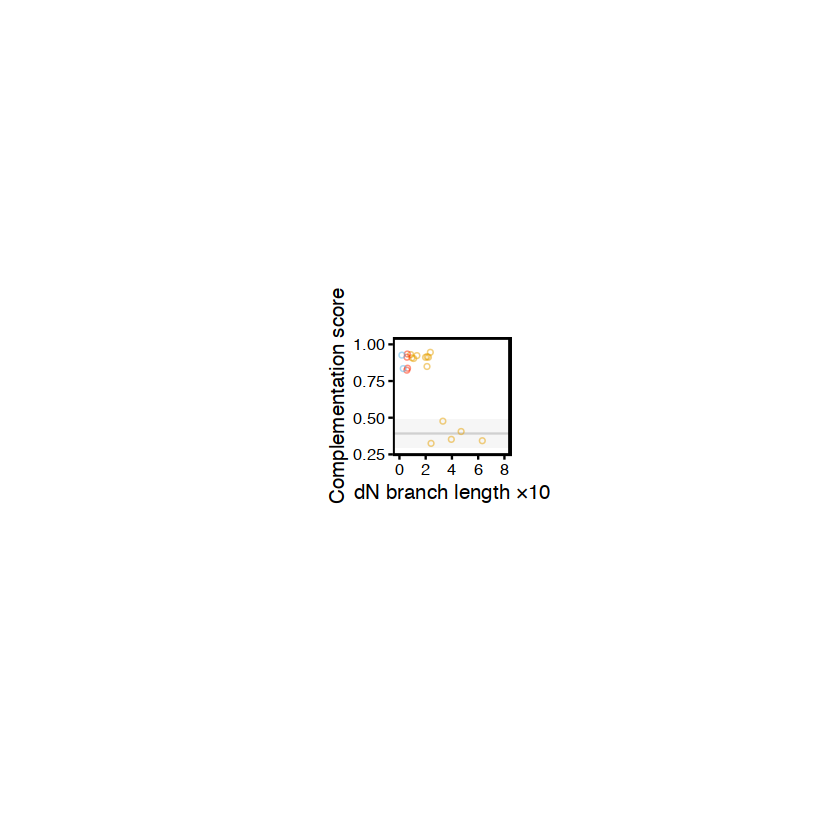

In [39]:
#Vehicle 


scatter  = ggplot(data=data,aes(y=CompAUC,x=PreWGD*10,color=Status)) + 
                       geom_hline(yintercept=0.39216686,color="#ababab",alpha=0.5)+
    annotate('rect', xmin=-0.5, xmax=8.5, ymin=0.39216686-2*(0.048384324), ymax=0.39216686+2*(0.048384324), alpha=.1, fill='#ababab')+

 geom_point(alpha=0.5,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(0.245,1.05),breaks=c(.25,.5,.75,1)) +  
            scale_x_continuous(expand=c(0,0),limits=c(-0.5,8.5)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ scale_color_manual(values=c('Post-WGD_lost'="#FF2600",'Post-WGD_m'="#E69F00",'Non-WGD'="#56B4E9"))+ 
        xlab(bquote('dN branch length ×10'))+
         ylab(bquote('Complementation score' ))

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    grid.newpage()
    grid.draw(p)
    ggsave(plot=p,paste("./Results/branchlengthVScomplementation_scatter.pdf" ,sep=""),width=unit(5,"cm"),height=unit(5,"cm"))




In [40]:
cor.test(data$CompAUC, data$PreWGD, method="pearson")


	Pearson's product-moment correlation

data:  data$CompAUC and data$PreWGD
t = -5.3924, df = 18, p-value = 4.003e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9114472 -0.5264972
sample estimates:
       cor 
-0.7859116 
